# Sales Forecasting

*The dataset for this project originates from the [Superstore Sales Dataset](https://www.kaggle.com/shobanama/superstore)*
<br>

*Notebook File - [Sales_Forecasting.ipynb](https://anaconda.org/arun2728/salesforecasting/notebook)*

*Github Repo - [Sales Forecasting](https://github.com/arun2728/data-science-portfolio/tree/main/Sales%20Forecasting)*


### Background:

In this modern times where every business is highly dependent on its data to make better decisions for developing business, time series analysis plays an important role in helping different business entities to get an idea about how good their sales are by implementing sales forecating on the historic data.

I have ultisied the dataset to perform expolratory data analysis to gain valuable insights and further apply time series analysis to get a forecast of sales after time period of 7 days.

### Problem Statement: 

Analyze the sales of the store and predict the sales of the next 7 days from the last date in the dataset.

### Dataset Information

1) **Row ID:** Index of the entry

2) **Order ID:** ID created when a product order is placed.

3) **Order Date:** Date on which a customer places his/her order.

4) **Ship Date:** Date on which the order is shipped.

5) **Ship Mode:** Mode of shipment of each order.

6) **Customer ID:** ID assigned to each customer who places an order.

7) **Customer Name:** Name of Customer

8) **Segment:** Section from where the order is placed

9) **Country:** Country details of this data set. We are looking only for US store data.

10) **City:** Cities of US are listed here.

11) **State:** States of US are listed here.

12) **Postal Code:** pin code

13) **Region:** Region - east, west, north, south

14) **Product ID:** Product ID of each product

15) **Category:** Category to which each product belongs to.

16) **Sub-Category:** Sub-Category of each Category

17) **Product Name:** Name of products.

18) **Sales:** Selling Price of each product.

19) **Quantity:** number of quantity available for a particular product.

20) **Discount:** Discount available on each product.

21) **Profit:** Profit gained on each product.

<a id ='toc'></a>
# Table of Contents

1. **[Environment Setup](#environment_setup)**
    - 1.1 - **[Install Package](#install_packages)**
    - 1.2 - **[Load Dependencies](#import_packages)**
2. **[Load dataset](#load_data)**
3. **[Data Types and Dimensions](#Data_Types)**
4. **[Data Preprocessing](#data_preprocessing)**
    - 4.1 - **[Data Cleaning](#data_cleaning)**
        - 4.1.1 - [Remove irrelevant features](#irrelevant)
        - 4.1.2 - [Convert Data Types](#convert_datatypes)
        - 4.1.3 - [Missing Data Treatment](#missing_values)
    - 4.2 - **[Exploratory Data Analysis](#exploratory_analysis)**
        - 4.2.1 - [Product level analysis](#product)
        - 4.2.2 - [Customer level analysis](#customer)
        - 4.2.3 - [Order level analysis](#order)
5. **[Time Series Modeling](#tsm)**
    - 5.1 - [Visualize the Time Series](#visualize)
    - 5.2 - [Stationarize the Series](#stationarize)
    - 5.3 - [Find Optimal Parameters](#optimal)
    - 5.4 - [Build ARIMA Model](#arima)
    - 5.5 - [Make Predictions](#predict)
6. **[Conclusion](#conclusion)**

<a id ='environment_setup'></a>
## 1. Environment Setup

[goto toc](#toc)

<a id ='install_packages'></a>
### 1.1. Install Packages

Install required packages

[goto toc](#toc)

In [1]:
# Install pandas
! pip install pandas

# Install matplotlib
! pip install matplotlib

# Install seaborn
! pip install seaborn 

# Install sklearn
! pip install sklearn

# Install tqdm to visualize iterations
! pip install tqdm

<a id ='import_packages'></a>
### 1.2. Load Dependencies

Import required packages

[goto toc](#toc)

In [588]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
import itertools

# Pretty display for notebooks
%matplotlib inline

import seaborn as sns

# Set default setting of seaborn
sns.set()

In [577]:
# Packages for timeseries modeling
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams

# Import performance metric
from sklearn.metrics import mean_squared_error

# Import warning to ignore them
import warnings
warnings.filterwarnings('ignore')

In [6]:
# To save the model
import joblib

In [7]:
# Create output folder to save model and plots
import os

# Get current working directory
current_dir = os.getcwd()

# Folder to save model
model_dir = current_dir + "/model"
os.makedirs(model_dir, exist_ok=True)

# Folder to save plots
plots_dir = current_dir + "/plots"
os.makedirs(plots_dir, exist_ok=True)

<a id ='load_data'></a>
## 2. Load dataset

Read data from personal_loan.csv file using pandas method read_csv().

[goto toc](#toc)

In [8]:
# read the data
raw_data = pd.read_excel(current_dir + '/data/US Superstore data.xls')

# print the first five rows of the data
raw_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<a id ='Data_Types'></a>
## 3. Data Types and Dimensions

[goto toc](#toc)

In [9]:
print("Superstore Sales Data Set has \033[4m\033[1m{}\033[0m\033[0m data points with \033[4m\033[1m{}\033[0m\033[0m variables each.".format(*raw_data.shape))

Superstore Sales Data Set has 9994 data points with 21 variables each.


In [10]:
# check the data types of the features
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

<a id='data_preprocessing'></a>
## 4. Data Preprocessing


*Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format.*

[...goto toc](#toc)

<a id='data_cleaning'></a>
## 4.1. Data Cleaning

*Data cleaning* refers to preparing data for analysis by removing or modifying data that is incomplete, irrelevant, duplicated, or improperly formatted.

[...goto toc](#toc)

<a id='irrelevant'></a>
## 4.1.1. Remove irrelevant features

The first and foremost thing you should do is remove useless pieces of data from your system. Any useless or irrelevant data is the one you don’t need. It might not fit the context of your issue.

[...goto toc](#toc)

In [11]:
# Create copy of the dataframe
data_1 = raw_data.copy(deep = True)

In [12]:
data_1.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'], dtype=object)

In [13]:
# Dropping Unneccesary columns
data_1.drop(['Row ID', 'Order ID', 'Customer ID', 'Product ID'], axis=1, inplace=True)

# print first five rows
data_1.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9994 non-null   datetime64[ns]
 1   Ship Date      9994 non-null   datetime64[ns]
 2   Ship Mode      9994 non-null   object        
 3   Customer Name  9994 non-null   object        
 4   Segment        9994 non-null   object        
 5   Country        9994 non-null   object        
 6   City           9994 non-null   object        
 7   State          9994 non-null   object        
 8   Postal Code    9994 non-null   int64         
 9   Region         9994 non-null   object        
 10  Category       9994 non-null   object        
 11  Sub-Category   9994 non-null   object        
 12  Product Name   9994 non-null   object        
 13  Sales          9994 non-null   float64       
 14  Quantity       9994 non-null   int64         
 15  Discount       9994 n

In [15]:
# Reorder the dataset with respect to Order Date
data_1.sort_values(by = 'Order Date').reset_index(drop = True, inplace = True)

In [16]:
data_1.head(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


<a id='missing_values'></a>
## 4.1.3. Missing Data Treatment

If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.

[...goto toc](#toc)

In [17]:
# Function to get missing values
def get_missing(data):
    
    # Create the dataframe
    missing_values = pd.DataFrame()

    # Get list of all columns
    missing_values['Features'] = data.columns.values

    # get the count of missing values
    missing_values['Count'] = data.isnull().sum().values

    # Calculate percentage of missing values
    percentage = data.isna().mean()*100
    missing_values['Percentange'] = percentage.values

    # return the dataframe
    return missing_values

In [109]:
# Function to plot missing values
def plot_missing(missing_values):
    # Plot missing values

    # Get list of features
    columns = missing_values.Features.values.tolist()

    # Get index's
    ind = missing_values.index.to_list() 

    if missing_values.Count.values.sum() == 0:
        print("\033[1mNo Missing values found in the dataset\033[0m")
        return
    # Create subplots
    fig, ax = plt.subplots(2,1,figsize=(18, 18))

    # Plot missing values based on count
    rects = ax[0].barh(ind, missing_values.Count.values.tolist(), color='lightblue')
    ax[0].set_yticks(ind)
    ax[0].set_yticklabels(columns, rotation='horizontal')
    ax[0].set_xlabel("Count of missing values")
    ax[0].set_title("Variables with missing values")

    # Plot missing values based on percentage
    rects = ax[1].barh(ind, missing_values.Percentange.values.tolist(), color='pink')
    ax[1].set_yticks(ind)
    ax[1].set_yticklabels(columns, rotation='horizontal')
    ax[1].set_xlabel("Percentage of missing values")
    ax[1].set_title("Variables with missing values")

In [110]:
plot_missing(get_missing(data_1))

No Missing values found in the dataset


In [21]:
# Get categorical features
categorical_features = data_1.select_dtypes('object').columns.values.tolist()

# Get nuemric features
numerical_features = [col for col in data_1.columns.values if col not in categorical_features]

In [22]:
print("Superstore Sales Data Set has \033[4m\033[1m{}\033[0m\033[0m data points with \033[4m\033[1m{}\033[0m\033[0m variables each.".format(*data_1.shape))
print(f"Numeric features: \033[4m\033[1m{len(numerical_features)}\033[0m\033[0m \nCategorical features: \033[4m\033[1m{len(categorical_features)}\033[0m\033[0m")

Superstore Sales Data Set has 9994 data points with 17 variables each.
Numeric features: 7 
Categorical features: 10


<hr style="border:1px solid gray"> </hr>
<h3><center>Summary</center></h3>
<hr style="border:1px solid gray"> </hr>

| Number of Instances | Number of Attributes | Numeric Features | Categorical Features | Missing Values |
| :-: | :-: | :-: | :-: | :-: |
| 9994  | 17 | 7 | 10  | Null |

<a id='exploratory_analysis'></a>
## 4.2. Exploratory Analysis

The preliminary analysis of data to discover relationships between measures in the data and to gain an insight on the trends, patterns, and relationships among various entities present in the data set with the help of statistics and visualization tools is called Exploratory Data Analysis (EDA). 

Exploratory data analysis is cross-classified in two different ways where each method is either graphical or non-graphical. And then, each method is either univariate, bivariate or multivariate.

[...goto toc](#toc)

In [23]:
# Create copy of the dataframe
data = data_1.copy()

<a id='product'></a>
### 4.2.1. Product Level Analysis

[...goto toc](#toc)

**Let's look at the revenue generated by each category!**

In [24]:
# Get list of categories of products and their count
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [25]:
# Sort the Categories as per the sales
data_category = data.groupby(["Category"]).sum().sort_values("Sales", ascending=False)['Sales']

# Get revenue generated as per category
total_revenue_category = int(data_category.sum())
print(f"Total revenue earned by selling products of all category - $\033[4m\033[1m{total_revenue_category}\033[0m\033[0m")

Total revenue earned by selling products of all category - $2297200


In [26]:
# Function to get exact value generated on each category
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format

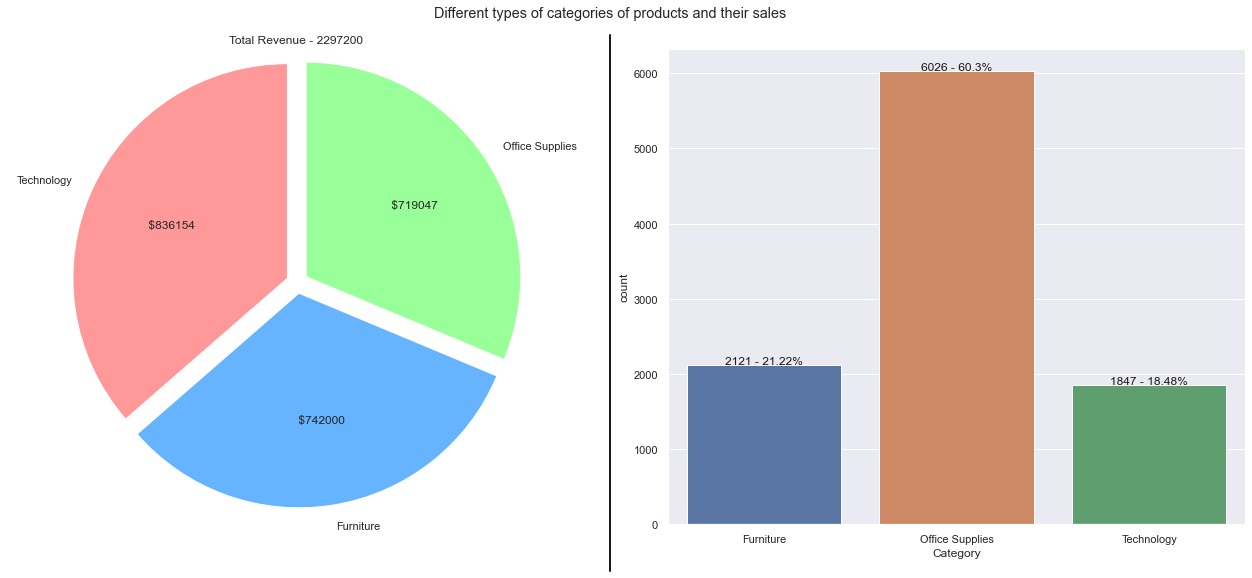

In [342]:
explode = (0.05, 0.05, 0.05)

# Set width and height of the figure
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

# Add title to the figure
fig.suptitle("Different types of categories of products and their sales")

# Set font size and weight
plt.rcParams.update({'font.size': 12,
                    "font.weight": 6})

# Set colors of the piechart
colors = ['#ff9999','#66b3ff','#99ff99']

# Plot piechart
axes[0].pie(data_category.values, colors = colors, labels = data_category.index, autopct = autopct_format(data_category.values), 
       startangle = 90, explode = explode)

# Equal aspect ratio ensures that pie is drawn as a circle
axes[0].axis('equal') 

# place total revenue generated by individual categories at the center
#label = ax[0].annotate('Total Revenue \n' + str(total_revenue_category), color = 'red', xy=(0, 0), fontsize=12, ha="center")
axes[0].title.set_text('Total Revenue - ' + str(total_revenue_category))

# Plot catplot
sns.countplot(x = "Category", data = data, ax = axes[1])

# To show the exact revenue generated on the figure
count_categories = [2121, 6026, 1847]
for i in range(len(count_categories)):
    text = f"{str(count_categories[i])} - {round((count_categories[i] * 100) / sum(count_categories), 2)}%"
    plt.text(i, count_categories[i] + 15, text, fontsize=12, color='k', horizontalalignment='center')
    
# Reduce padding
plt.tight_layout(w_pad = 0, h_pad = 5)

# Add a horizontal line
line = plt.Line2D((.5,.5),(0,.93), color="k", linewidth = 2)
fig.add_artist(line)


# Save the figure
plt.savefig(current_dir + "/plots/analysis_of_categories.png")

# Show the plot
plt.show()

**Important Inferences**

- The store have highest number of **Office Supplies** products with total **60.3%** while minimum number of **Technology** products (1847) i.e **18.48%**.

- But the store have earned highest revenue of **$836154** from **Technology** products.

- Even though the store have higher number of office supplies but have a less revenue as compared to other categories.

- The Total Revenue generated by all the categories - **$2,261,536**

**Let's look at the revenue generated by each sub-category!**

In [345]:
# Create the dataframe to store sales and profits earned on each sub-category
data_subcat = pd.DataFrame(columns = ['Category', "Sub-Category", "Sales", "Profit"])

# Variable to store count of indexs
index = 0

# Iterate over each sub-category
for i in data["Sub-Category"].unique().tolist():
    # Add category of the current sub-category
    data_subcat.loc[index, "Category"] = data[data["Sub-Category"] == i]["Category"].unique()[0]
    
    # Add subcategory to the dataframe
    data_subcat.loc[index, "Sub-Category"] = i
    
    # Add total sales generated by the sub-category
    data_subcat.loc[index, "Sales"] = data[data["Sub-Category"] == i]["Sales"].sum()
    
    # Add total profit generated on each sub-category
    data_subcat.loc[index, "Profit"] = data[data["Sub-Category"] == i]["Profit"].sum()
    
    # Update the index
    index += 1
    
# print the dataframe
data_subcat

,Category,Sub-Category,Sales,Profit
0,Furniture,Bookcases,114879.9963,-3472.556
1,Furniture,Chairs,328449.103,26590.1663
2,Office Supplies,Labels,12486.312,5546.254
3,Furniture,Tables,206965.532,-17725.4811
4,Office Supplies,Storage,223843.608,21278.8264
5,Furniture,Furnishings,91705.164,13059.1436
6,Office Supplies,Art,27118.792,6527.787
7,Technology,Phones,330007.054,44515.7306
8,Office Supplies,Binders,203412.733,30221.7633
9,Office Supplies,Appliances,107532.161,18138.0054


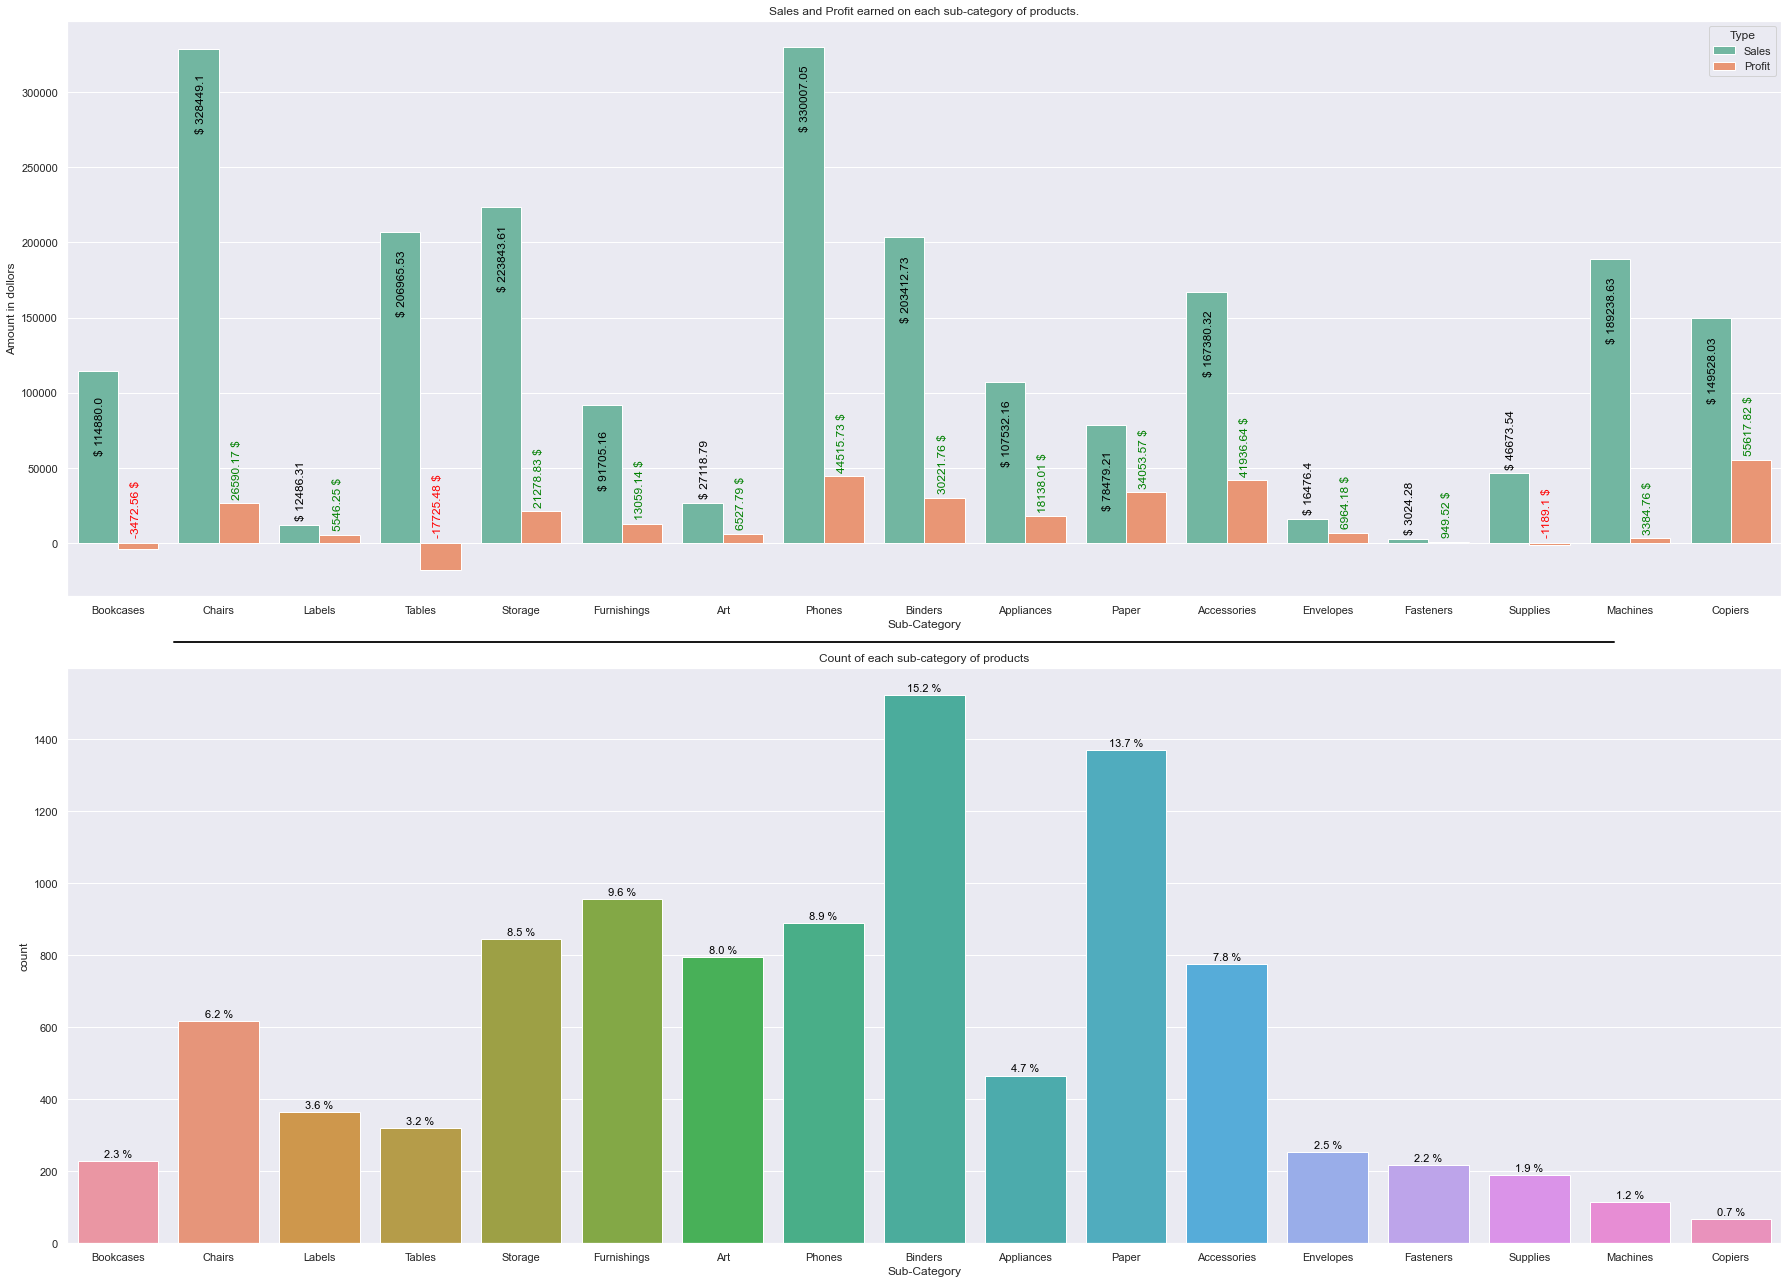

In [343]:
# Create the dataframe to merge sales and profits
temp = pd.DataFrame()

# Merge sales and profits
temp["Count"] = data_subcat["Sales"].values.tolist() + data_subcat["Profit"].values.tolist()

# Add sub-categories
temp["Sub-Category"] = data_subcat["Sub-Category"].values.tolist() + data_subcat["Sub-Category"].values.tolist()
temp["Type"] = ["Sales" if i < 17 else "Profit" for i in range(34) ]

# Plot the figure representing sales, profits and count of each sub-category
fig, ax = plt.subplots(2, 1, figsize = (25,18))

# Plot a barplot to show the sales and profits on each sub-category
sns.barplot(x = "Sub-Category", y = "Count", hue = "Type", data = temp, ax = ax[0], palette="Set2")

# Set ylabel of the plot
ax[0].set_ylabel("Amount in dollors")

# Set title of the plot
ax[0].set_title("Sales and Profit earned on each sub-category of products.")

# Iterate over sales, to add it's value on the bars
for k,v in enumerate([round(i, 2) for i in temp[temp.Type == "Sales"].Count.values.tolist()]):
    if v > 50000:
        ax[0].text(k - 0.18,  v - 55000 ,'$ '+ str(v), fontsize = 12, rotation = 90, color = 'black', horizontalalignment = 'center')
    else:
        ax[0].text(k - 0.18,  v + 4000 ,'$ '+ str(v), fontsize = 12, rotation = 90, color = 'black', horizontalalignment = 'center')

# Iterate over profits, to add it's value on the bars
for k,v in enumerate([round(i, 2) for i in temp[temp.Type == "Profit"].Count.values.tolist()]):
    if v < 0:
        ax[0].text(k + 0.18,  5000, str(v) + ' $', fontsize = 12, rotation = 90, color = 'red', horizontalalignment = 'center')
        continue
    ax[0].text(k + 0.18,  v + 4000, str(v) + ' $', fontsize = 12, rotation = 90, color = 'Green', horizontalalignment = 'center')
    

# Plot as countplot
sns.countplot(x = "Sub-Category", data = data, ax = ax[1])

# Add title to the countplot
ax[1].set_title("Count of each sub-category of products")

# List to store all the sub-categories of the products
sub_categories = ["Bookcases", "Chairs", "Labels", "Tables", "Storage", "Furnishings", "Art", "Phones", "Binders", "Appliances", 
                  "Paper", "Accessories", "Envelopes", "Fasteners", "Supplies", "Machines", "Copiers"]

# Get values count of each sub-category
sub_cat_count = data["Sub-Category"].value_counts()

# Get total number of products sold by the store
total = sub_cat_count.sum()

# iterate of each sub-category to write their percentage 
for k,v in enumerate(sub_categories):
    # Calculate percentage 
    percent = round((sub_cat_count.loc[v] * 100) / total, 1)
    # Add percentage to the graph
    ax[1].text(k,  sub_cat_count.loc[v] + 10, str(percent) + " %", fontsize = 11, rotation = 0, color = 'Black', 
               horizontalalignment = 'center')
    
# Remove width padding and set height padding
plt.tight_layout(w_pad = 0, h_pad = 2)

# Create a horizontal line
line = plt.Line2D((.1,.9), (.5,.5), color="k", linewidth = 2, transform = plt.gcf().transFigure, clip_on = False)

# Add the horizontal line to the plot
fig.add_artist(line)

# Save the plot
plt.savefig(current_dir + "/plots/analysis_of_sub_categories.png")

# Show the plot
plt.show()

**Important Inferences**

- The store has wide variety of Office Supplies especially in Binders and Paper department.

- **Phones** generated the highest revenue of about **$327782**

- Lowest revenue from **Fasteners** of **$3001.96**

- Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

- Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

**Let's see which products contributed most to the revenue**

In [431]:
# Which products contributed most to the revenue?

# Sort the product names as per the sales
top_products = data.groupby(["Product Name"]).sum().sort_values("Sales",ascending=False).head(8) 

# Round off the Sales Value up to 2 decimal places
top_products = top_products[["Sales"]].round(2) 

# Since we have used groupby, we will have to reset the index to add the product names into the dataframe
top_products.reset_index(inplace=True) 

# To find the total revenue generated by all the top products
total_revenue_products = top_products["Sales"].sum() 

# Convert the total_revenue_products from float to int and then to string
total_revenue_products = str(int(total_revenue_products)) 

# Adding '$' sign before the Value
total_revenue_products = '$ ' + total_revenue_products 

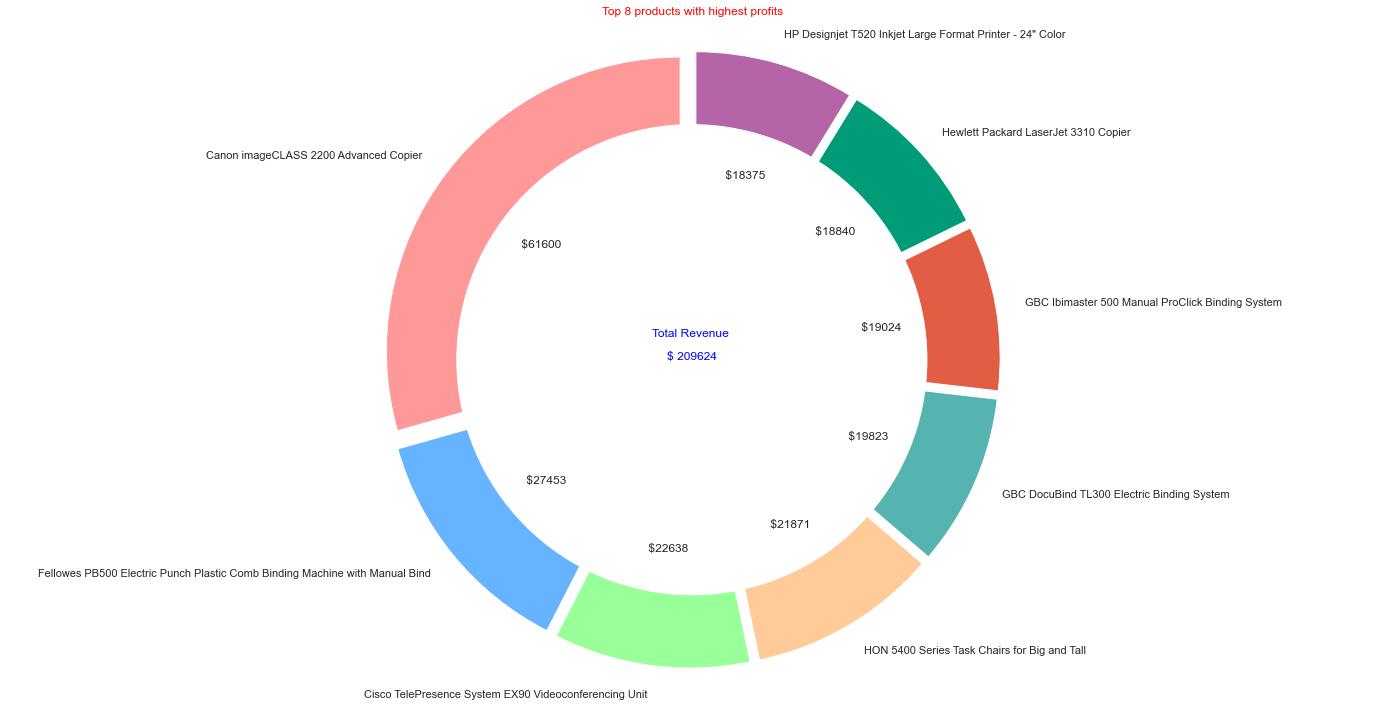

In [439]:
# Set width and height of figure is defined in inches
plt.rcParams["figure.figsize"] = (20, 10) 

# Set font size 
plt.rcParams['font.size'] = 12.0 

# List to store colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77','#B565A7'] 
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

# Create a figure
fig1, ax1 = plt.subplots()

# Draw the pie-chart
ax1.pie(Top_products['Sales'], colors = colors, labels=Top_products['Product Name'], 
        autopct= autopct_format(Top_products['Sales']), startangle=90,explode=explode)

# Draw a circle on the pie chart
centre_circle = plt.Circle((0,0), 0.8,fc='white') 

# Add circle to pie-chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

# Add title to the plot
#plt.title("Top 8 products with highest profits")
ax1.set_title('Top 8 products with highest profits', color = "red")


# Create a label to show total revenue
label = ax1.annotate('Total Revenue \n\n'+str(total_revenue_products),color = 'Blue', xy=(0, 0), fontsize = 12, ha="center")

# Remove redudant spaces
plt.tight_layout(w_pad=0, h_pad=0)

# Save the plot
plt.savefig(current_dir + "/plots/highest_profit_products.png")

# Show the plot
plt.show()

**Observation**

- We can see that Product - Canon imageCLASS 2200 Advanced Copier generated the highest revenue of about $61600

- The Total Revenue generated by all these products - $209624!

<a id='customer'></a>
### 4.2.2. Customer Level Analysis

[...goto toc](#toc)

**Analysis of the type of customers - Segement**

In [350]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [351]:
# Create the dataframe to store sales and profits earned on each segment of customers
data_segment = pd.DataFrame(columns = ['Segment', "Count", "Sales", "Profit"])

# Variable to store count of indexs
index = 0

# Iterate over each Segment of customers
for i in data["Segment"].unique().tolist():
    # Add segment to the dataframe
    data_segment.loc[index, "Segment"] = i
    
    # Get count of each category
    data_segment.loc[index, "Count"] = data[data["Segment"] == i].shape[0]
    
    # Add total sales generated by the Segment of customer
    data_segment.loc[index, "Sales"] = data[data["Segment"] == i]["Sales"].sum()
    
    # Add total profit generated on each segment of customers
    data_segment.loc[index, "Profit"] = data[data["Segment"] == i]["Profit"].sum()
    
    # Update the index
    index += 1
    
# print the dataframe
data_segment

,Segment,Count,Sales,Profit
0,Consumer,5191,1161401.345,134119.2092
1,Corporate,3020,706146.3668,91979.134
2,Home Office,1783,429653.1485,60298.6785


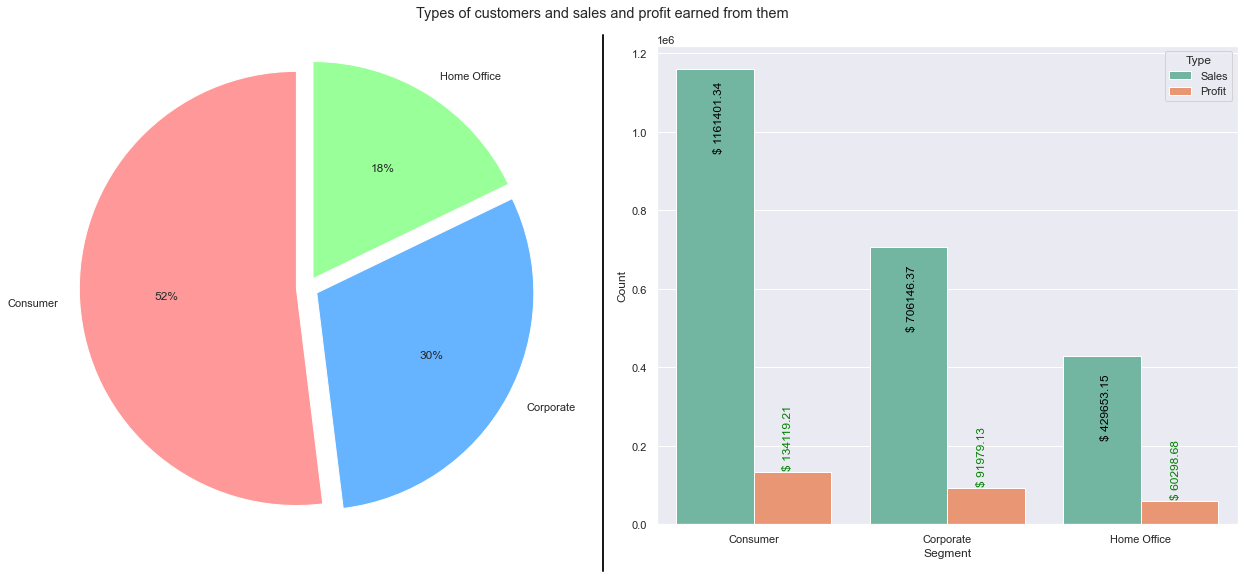

In [405]:
# Set width and height of the figure
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

# Add title to the figure
fig.suptitle("Types of customers and sales and profit earned from them")

# Set font size and weight
plt.rcParams.update({'font.size': 12,
                    "font.weight": 6})

# Set colors of the piechart
colors = ['#ff9999','#66b3ff','#99ff99']

# Plot piechart
axes[0].pie(data_segment.Count.values, colors = colors, labels = data_segment.Segment.values, autopct='%1.0f%%', 
       startangle = 90, explode = explode)


# Equal aspect ratio ensures that pie is drawn as a circle
axes[0].axis('equal') 



# Create the dataframe to merge sales and profits
temp = pd.DataFrame()

# Merge sales and profits
temp["Count"] = data_segment["Sales"].values.tolist() + data_segment["Profit"].values.tolist()

# Add sub-categories
temp["Segment"] = data_segment["Segment"].values.tolist() + data_segment["Segment"].values.tolist()
temp["Type"] = ["Sales" if i < 3 else "Profit" for i in range(6) ]

# Plot the profit and sales of the store on individual customer segments
sns.barplot(x = "Segment", y = "Count", data = temp, hue = "Type", ax = axes[1], palette="Set2")

# Iterate over sales, to add it's value on the bars
for k,v in enumerate([round(i, 2) for i in temp[temp.Type == "Sales"].Count.values.tolist()]):
    axes[1].text(k - 0.18,  v - 210000 ,'$ '+ str(v), fontsize = 12, rotation = 90, color = 'black', horizontalalignment = 'center')

# Iterate over profits, to add it's value on the bars
for k,v in enumerate([round(i, 2) for i in temp[temp.Type == "Profit"].Count.values.tolist()]):
    axes[1].text(k + 0.18,  v + 10000, "$ " + str(v), fontsize = 12, rotation = 90, color = 'Green', horizontalalignment = 'center')

# Add a horizontal line
line = plt.Line2D((.5,.5),(0,.93), color="k", linewidth = 2)
fig.add_artist(line)

# Remove blank spaces
plt.tight_layout(w_pad=0, h_pad=0)

# Save the plot
plt.savefig(current_dir + "/plots/segments.png")
# Show the plot
plt.show()

**Important Inferences**

- The store have three types of customers - **Consumers**, **Corporates**, and **Home office**

- Out the total number of customers the store have **50 percent** of them are consumer and they provide a highest profit of 134,119 dollor with sales of 1,161,401 dollors.

- Store need to work on improving profits earned on consumers

In [402]:
# Get top 10 frequently ordered customers
cust_top10 = data['Customer Name'].value_counts().head(10)
cust_top10

William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Edward Hooks           32
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Arthur Prichep         31
Zuschuss Carroll       31
Name: Customer Name, dtype: int64

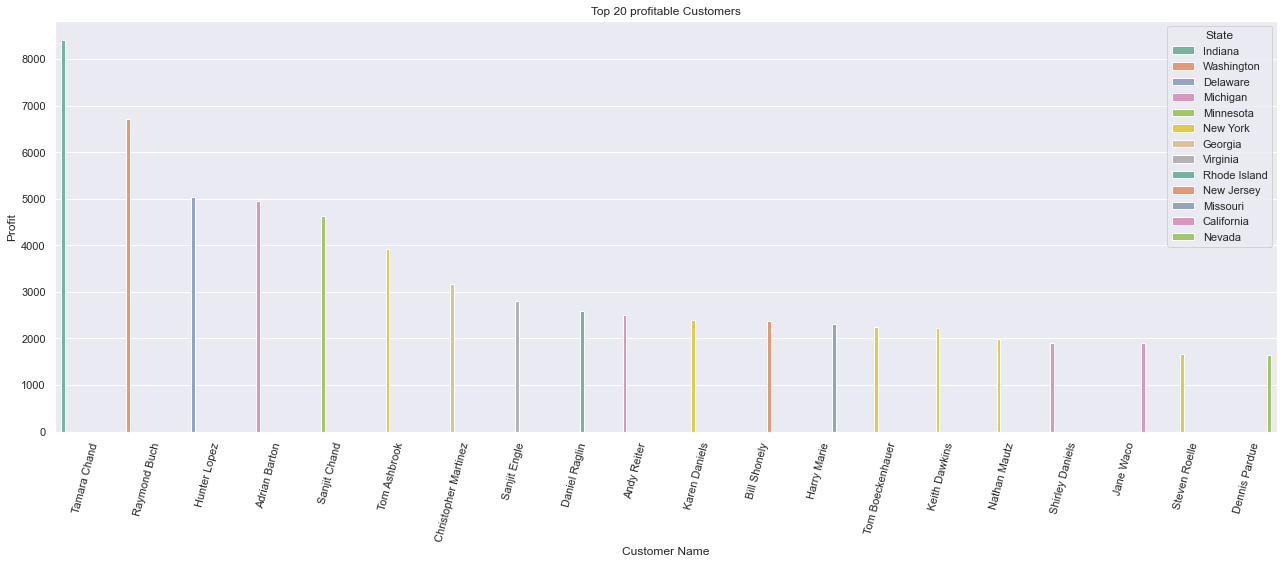

In [418]:
# Get top 20 Customers who benefitted the store
sortedTop20 = data.sort_values(['Profit'], ascending=False).head(20)

# Plot a figure
fig, ax = plt.subplots(1, figsize=(18,8))
# Plot barplot
p = sns.barplot(x = 'Customer Name', y = 'Profit', hue = 'State', palette = 'Set2', data = sortedTop20, ax = ax)

# Set title pf the plot
ax.set_title("Top 20 profitable Customers")

# Rotate xaxis labels
ax.set_xticklabels(p.get_xticklabels(), rotation=75)

# Remove unwanted space
plt.tight_layout()

# Show the plot
plt.show()

**Note:** We see that majority of the Profitable Customers are from New York and Michigan State.

**Region with hightest number of sales**

In [444]:
# Sort the Region as per the sales
top_region = data.groupby(["Region"]).sum().sort_values("Sales", ascending=False)

# Cast Sales column to integer data type
top_region = top_region[["Sales", "Profit"]].astype(int) 

# Since we have used groupby, we will have to reset the index to add the Region column into the data frame
top_region.reset_index(inplace=True) 

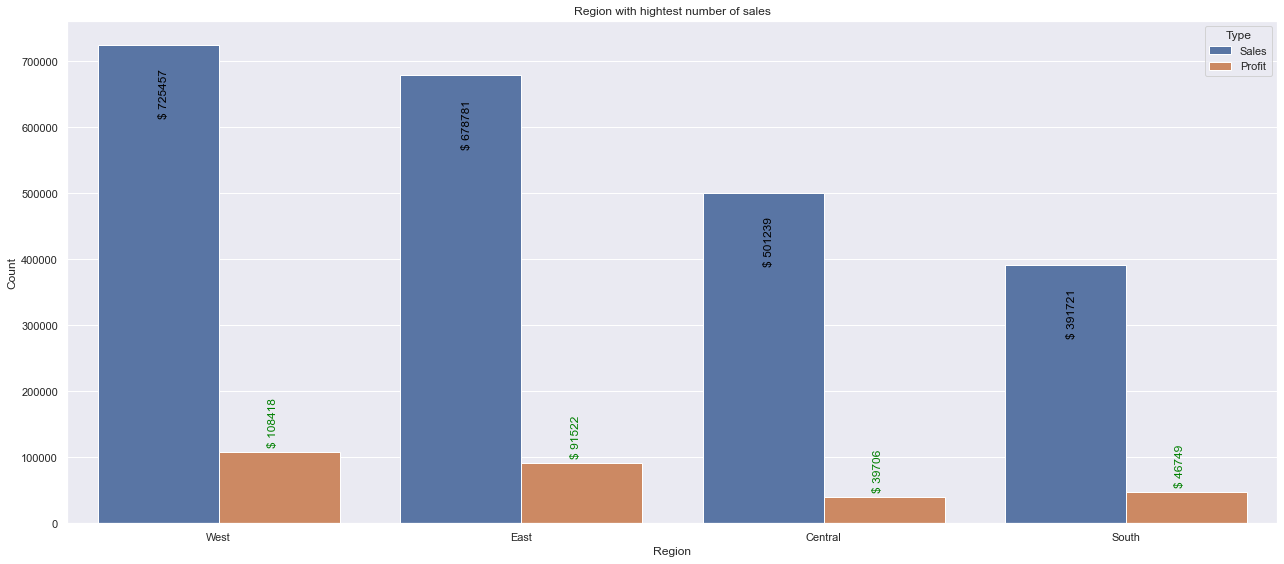

In [464]:
# Create the dataframe to merge sales and profits
temp = pd.DataFrame()

# Merge sales and profits
temp["Count"] = top_region["Sales"].values.tolist() + top_region["Profit"].values.tolist()

# Add sub-categories
temp["Region"] = top_region["Region"].values.tolist() + top_region["Region"].values.tolist()
temp["Type"] = ["Sales" if i < 4 else "Profit" for i in range(8)]

# Plot the figure
fig, ax = plt.subplots(1, figsize = (18,8))

# Plot the profit and sales of the store on individual customer segments
sns.barplot(x = "Region", y = "Count", data = temp, hue = "Type", ax = ax)

# Iterate over sales, to add it's value on the bars
for k,v in enumerate([round(i, 2) for i in temp[temp.Type == "Sales"].Count.values.tolist()]):
    ax.text(k - 0.18,  v - 108500,'$ '+ str(v), fontsize = 12, rotation = 90, color = 'black', horizontalalignment = 'center')

# Iterate over profits, to add it's value on the bars
for k,v in enumerate([round(i, 2) for i in temp[temp.Type == "Profit"].Count.values.tolist()]):
    ax.text(k + 0.18,  v + 10000, "$ " + str(v), fontsize = 12, rotation = 90, color = 'Green', horizontalalignment = 'center')

# Set title of the plot
plt.title("Region with hightest number of sales")
    
# Remove blank spaces
plt.tight_layout(w_pad=0, h_pad=0)

# Save the plot
plt.savefig(current_dir + "/plots/region_profit.png")

# Show the plot
plt.show()

**Observations**

- The store have higher number of sales (**725,457**) from West region with a net profit of **$ 108,418**
- Even though the store have majority of sales from central as compared to south, it's profit earned from central region is less than south region.

**Shipping mode with the highest sales**

In [468]:
# Sort the Shipping modes as per the sales
top_shipping = data.groupby(["Ship Mode"]).sum().sort_values("Sales", ascending=False) 

# keep only the sales column in the dataframe
top_shipping = top_shipping[["Sales"]] 

# Since we have used groupby, we will have to reset the index to add the Ship Mode column into the data frame
top_shipping.reset_index(inplace=True) 

# To find the total revenue generated as per shipping mode
total_revenue_ship = top_shipping["Sales"].sum() 

# Convert the total_revenue_ship from float to int and then to string
total_revenue_ship = str(int(total_revenue_ship)) 

# Adding '$' sign before the Value
total_revenue_ship = '$' + total_revenue_ship 

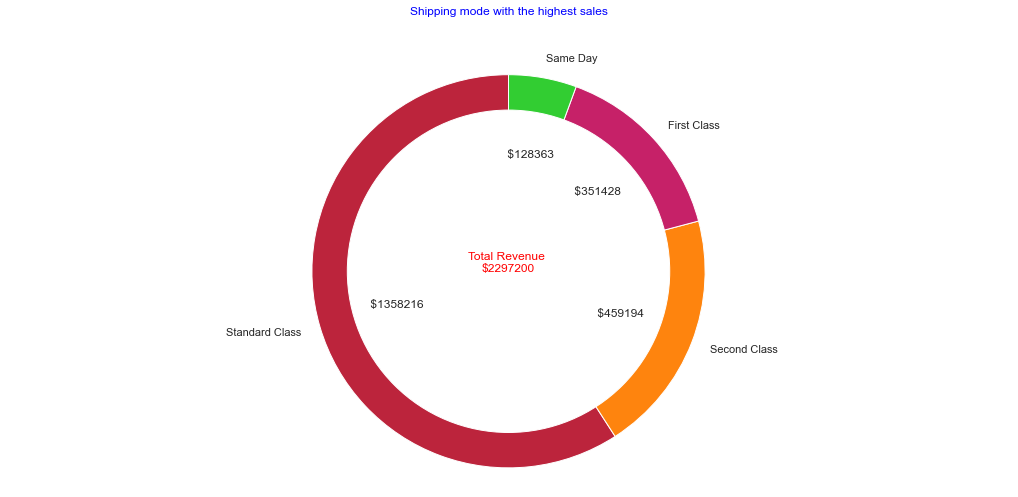

In [482]:
# Set width and height of figure is defined in inches
plt.rcParams["figure.figsize"] = (18, 8) 

# Set Font size
plt.rcParams['font.size'] = 12.0 

# Set Font weight is defined
plt.rcParams['font.weight'] = 6 

# define colors for the pie chart
colors = ['#BC243C','#FE840E','#C62168',"limegreen"] 

# Plot the figure
fig1, ax1 = plt.subplots()

# Plot the pie chart
ax1.pie(top_shipping['Sales'], colors = colors, labels = top_shipping['Ship Mode'], 
        autopct= autopct_format(top_shipping['Sales']), startangle=90)


# Add title to the plot
ax1.set_title("Shipping mode with the highest sales", pad=40, color = "blue")
# Draw a circle on the pie chart
centre_circle = plt.Circle((0,0),0.82,fc='white') 

# Add circle to pie-chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 

# Add total revenue to pie-chart
label = ax1.annotate('Total Revenue \n'+str(total_revenue_ship),color = 'red', xy=(0, 0), fontsize=12, ha="center")


# Remove redundant spaces from the plot
#plt.tight_layout(w_pad= 0, h_pad=0)

# Save the plot
plt.savefig(current_dir + "/plots/shipping_mode.png")

# Show the plot
plt.show()

**Observation**

We can see that Shipping mode - Standard Class generated the highest revenue of about **$ 1,340,831**. 

The Total Revenue generated by all the shipping modes - **$ 2,261,536**

<a id='order'></a>
### 4.2.3. Order Level Analysis

[...goto toc](#toc)

In [492]:
# Add year feature to data
data['Year'] = data["Order Date"].dt.year

In [494]:
# Get sales and profit as per year
data_year = data.groupby("Year")[["Sales", "Profit"]].sum()

array([2014, 2015, 2016, 2017], dtype=int64)

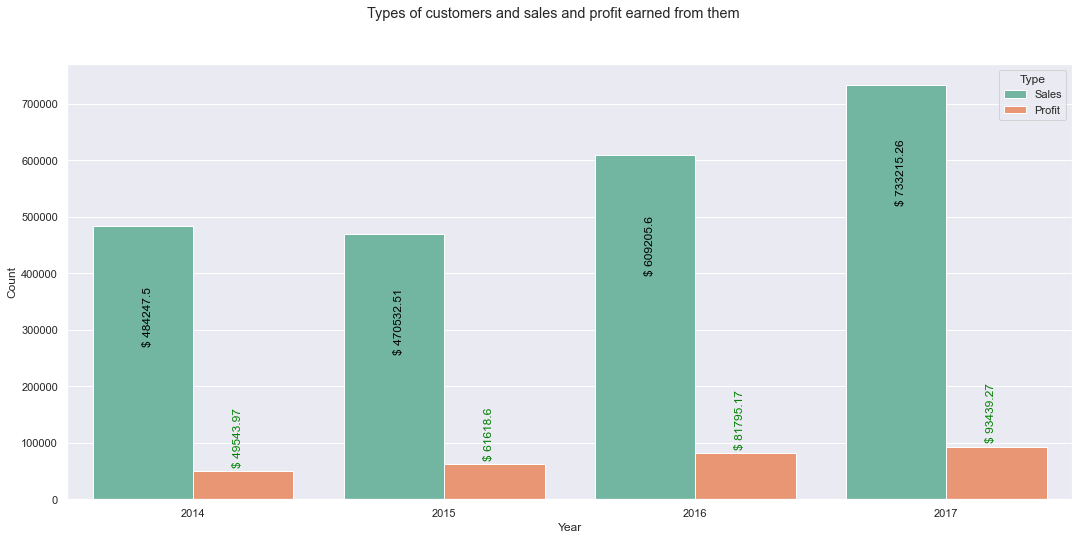

In [502]:
# Create the dataframe to merge sales and profits
temp = pd.DataFrame()

# Merge sales and profits
temp["Count"] = data_year["Sales"].values.tolist() + data_year["Profit"].values.tolist()

# Add sub-categories
temp["Year"] = data_year.index.values.tolist() + data_year.index.values.tolist()
temp["Type"] = ["Sales" if i < 4 else "Profit" for i in range(8) ]


# Set width and height of the figure
fig, axes = plt.subplots(1, figsize = (18, 8))

# Add title to the figure
fig.suptitle("Types of customers and sales and profit earned from them")

# Set font size and weight
plt.rcParams.update({'font.size': 12,
                    "font.weight": 6})


# Plot the profit and sales of the store on individual customer segments
sns.barplot(x = "Year", y = "Count", data = temp, hue = "Type", ax = axes, palette="Set2")

# Iterate over sales, to add it's value on the bars
for k,v in enumerate([round(i, 2) for i in temp[temp.Type == "Sales"].Count.values.tolist()]):
    axes.text(k - 0.18,  v - 210000 ,'$ '+ str(v), fontsize = 12, rotation = 90, color = 'black', horizontalalignment = 'center')

# Iterate over profits, to add it's value on the bars
for k,v in enumerate([round(i, 2) for i in temp[temp.Type == "Profit"].Count.values.tolist()]):
    axes.text(k + 0.18,  v + 10000, "$ " + str(v), fontsize = 12, rotation = 90, color = 'Green', horizontalalignment = 'center')


**Note:** It is clear that store sales and profits keeps on increasing over time peroid now we can develop a time-series model capacble enough to predict sales and profit of the store.

<a id='tsm'></a>
## 7. Time Series Modeling

[...goto toc](#toc)


There are several things that are time dependent, I mean, today's values can have an effective relationship to values that have occurred in the past.

Some examples related to the subject are demand of products during a certain period, harvest of commodities, stock prices and of course what we will try to predict, the sales of next 7 days of the store.

Currently there are several types of time series forecast models, in this notebook we will trying to use **Seasonal ARIMA** models.

#### Get the data ready

In [520]:
# Convert Order Date to Datetime datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9994 non-null   datetime64[ns]
 1   Ship Date      9994 non-null   datetime64[ns]
 2   Ship Mode      9994 non-null   object        
 3   Customer Name  9994 non-null   object        
 4   Segment        9994 non-null   object        
 5   Country        9994 non-null   object        
 6   City           9994 non-null   object        
 7   State          9994 non-null   object        
 8   Postal Code    9994 non-null   int64         
 9   Region         9994 non-null   object        
 10  Category       9994 non-null   object        
 11  Sub-Category   9994 non-null   object        
 12  Product Name   9994 non-null   object        
 13  Sales          9994 non-null   float64       
 14  Quantity       9994 non-null   int64         
 15  Discount       9994 n

In [673]:
# Get order date and sales from the data as we only need them for forecasting
time_series = data[["Order Date", "Sales"]]

# Rename the columns
time_series.columns = ["Date", "Sales"]

# Sort the dataset with respect to date
time_series = time_series.sort_values( by = ['Date'], ascending = True).reset_index(drop = True)

# Group the series with date
time_series = time_series.groupby("Date")[["Sales"]].sum()

time_series.index = pd.to_datetime(time_series.index) 
time_series = pd.DataFrame(time_series['Sales'].resample('D').mean())
time_series =  time_series.interpolate(method='linear')

# Print first five rows
time_series.head()

,Sales
Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158


In [674]:
time_series['month'] = [i.month for i in time_series.index]
time_series['year'] = [i.year for i in time_series.index]
time_series.head()

,Sales,month,year
Date,,,
2014-01-03,16.448,1,2014
2014-01-04,288.060,1,2014
2014-01-05,19.536,1,2014
2014-01-06,4407.100,1,2014
2014-01-07,87.158,1,2014


In [675]:
#time_series = time_series.dropna()

<a id='visualize'></a>
### 7.1. Visualize the Time Series

[...goto toc](#toc)

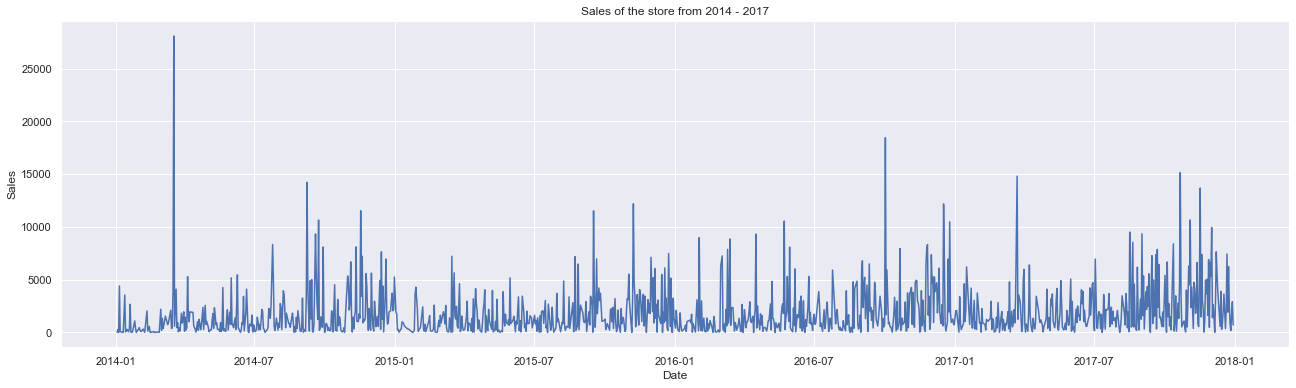

In [676]:
plt.figure(figsize=(22,6))
sns.lineplot(x = time_series.index, y = time_series['Sales'])
plt.title('Sales of the store from 2014 - 2017')
plt.show()

### Check for seasonality

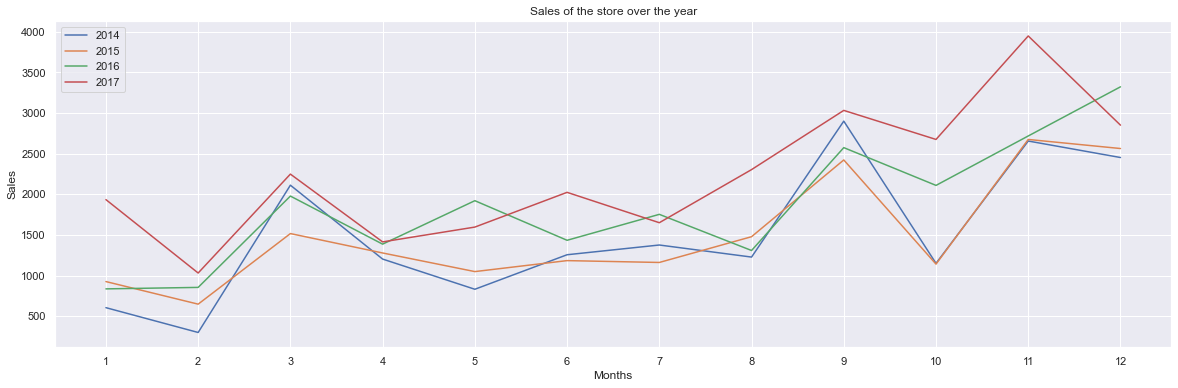

In [677]:
# Create a pivot table
pivot = pd.pivot_table(time_series, values='Sales', index='month', columns='year', aggfunc='mean')

# Plot pivot
pivot.plot(figsize=(20,6))
plt.title('Sales of the store over the year')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks([x for x in range(1,13)])
plt.legend()
plt.show()

Series seems to have some seasonality. Just to make the things clear, let's merge these lines into just one line by averaging the monthly levels.

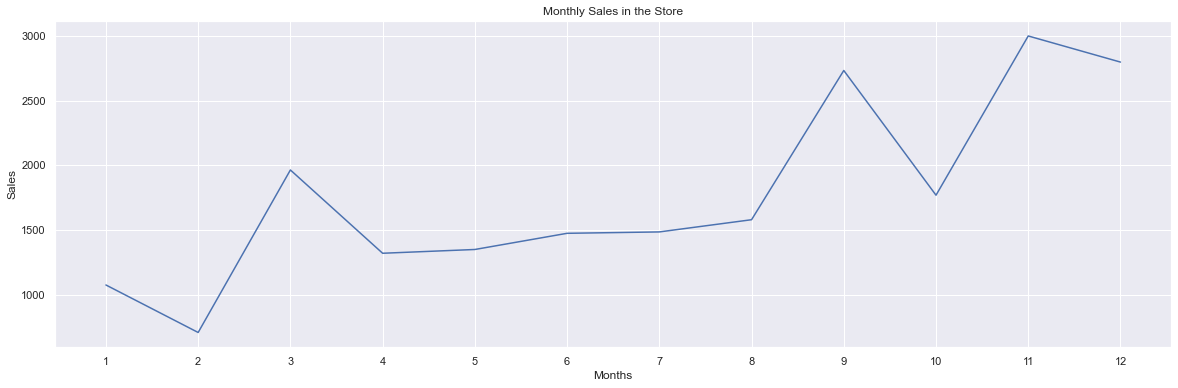

In [678]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Sales in the Store')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks([x for x in range(1,13)])
plt.show()

**Important Inferences**

The series clearly has some seasonality, 
- The sales of the store are lowest in the month of jan i.e start of the year
- The sales keeps on increasing as the year passes

<a id='stationarize'></a>
### 7.2. Stationarize the Series

[...goto toc](#toc)

To create a time series forecast, the series must be stationary.

**Conditions for Stationarity:**

1. Time series should have a constant mean.
2. Time series should have a constant standard deviation.
3. Time series’s auto-covariance should not depend on time.

**Check for Stationarity**

One way to check if the series is stationary is perform the **Adfuller test**.In adfuller test we use **ACF** and **PACF**.

- *Auto Correlation Function (ACF)*: It shows the correlation between the current temperatures versus the lagged versions of itself.

- *Partial autocorrelation (PACF)*: It shows the correlation between the current temperatures versus the lagged version excluding the effects of earlier lags.

**After performing Adfuller test if p-value is**

- Lower than 5% (usual number used for this kind of study) the series is stationary and we can start modelling.
- Greater than 5% then the series isn't stationary and we need do some data transformation like using natural logarithm, deflation, differencing, etc.

**Let's create a function which check the stationarity and plots:**

- The series itself;
- The autocorrelation function (ACF): It shows the correlation between the current temperatures versus the lagged versions of itself.
- The partial autocorrelation (PACF): It shows the correlation between the current temperatures versus the lagged version excluding the effects of earlier lags, for example, it show the effective influence of the lag 3 in the current temperatures excluding the effects of the lags 1 and 2.

In [679]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    
    # Convert to pandas series
    y = pd.Series(y)
    
    # Creating plots of the DF
    fig = plt.figure()
    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    # Plot the temperature
    y.plot(ax=ax1, figsize=figsize)
    # Set title
    ax1.set_title("Sales of the Store Variation")
    
    # Plot Auto Correlation using plot_acf of statsmodels
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    
    # Plot Partial Auto Correlation using plot_pacf of statsmodels
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    
    # Plot temperature as distibution
    sns.distplot(y, bins=int(math.sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    
    print('Results of Dickey-Fuller Test:')
    
    # Perform the Adfuller test
    adfinput = adfuller(y)
    
    # Create a series object
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    
    # Round them to four decimals
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest[f"Critical Value ({key})"] = value.round(4)
        
    print(adftest)
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%. The series seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%. The series isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                   -6.4212
p-value                           0.0000
Lags Used                        15.0000
Number of Observations Used    1442.0000
Critical Value (1%)              -3.4349
Critical Value (5%)              -2.8635
Critical Value (10%)             -2.5678
dtype: float64

The Test Statistics is lower than the Critical Value of 5%. The series seems to be stationary


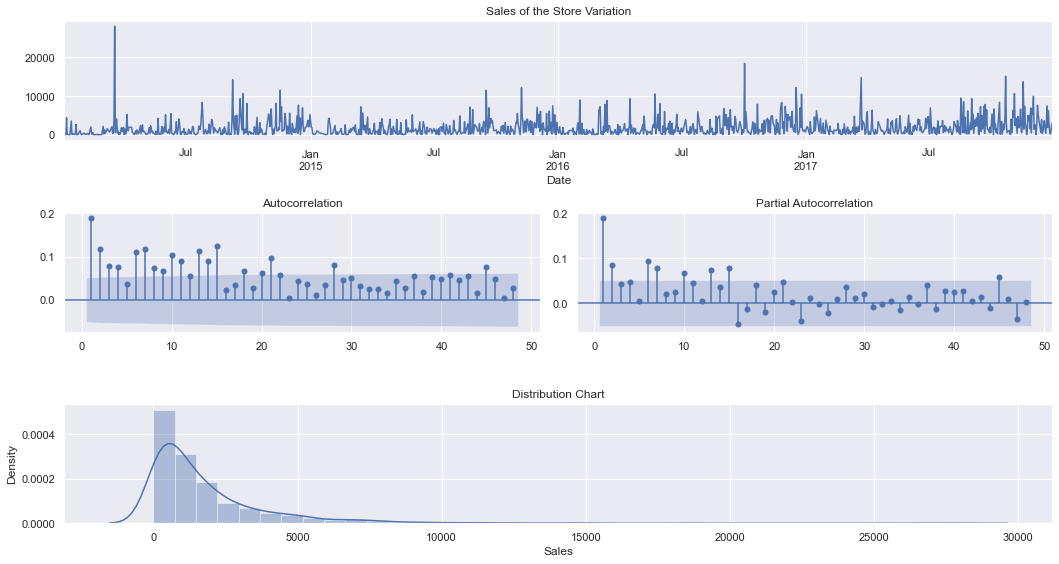

In [680]:
# Check stationarity
check_stationarity(time_series.Sales)

**Note:** The data is not complete stationary to do so we will perform log transformation

Results of Dickey-Fuller Test:
Test Statistic                   -6.4661
p-value                           0.0000
Lags Used                        13.0000
Number of Observations Used    1444.0000
Critical Value (1%)              -3.4349
Critical Value (5%)              -2.8635
Critical Value (10%)             -2.5678
dtype: float64

The Test Statistics is lower than the Critical Value of 5%. The series seems to be stationary


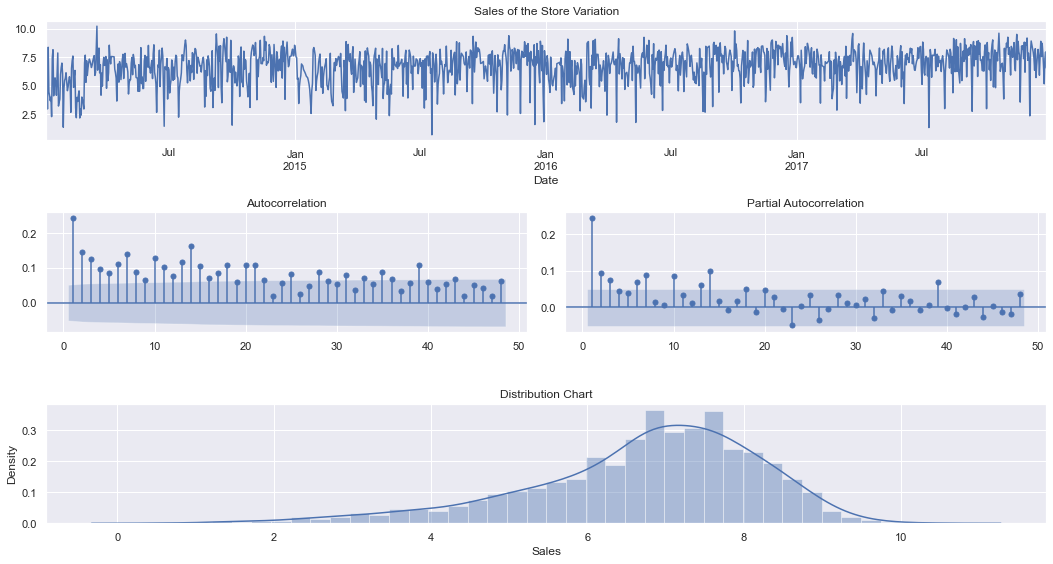

In [681]:
# Check stationarity
check_stationarity(np.log(time_series.Sales))

**Note:**

Now that we know our time series is data is stationary. Let us begin with model training for forecasting the sales. We have chosen SARIMA model to forecast the sales.

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that supports univariate time series data with a seasonal component. It requires selecting hyperparameters for both the trend and seasonal elements of the series.

- Trend Elements - There are three trend elements that require configuration
    - p: Trend autoregression order
    - d: Trend difference order
    - q: Trend moving average order.

- Seasonal Elements - There are four seasonal elements
    - P: Seasonal autoregressive order
    - D: Seasonal difference order
    - Q: Seasonal moving average order
    - m: The number of time steps for a single seasonal period.

**The notation for a SARIMA model is specified as: SARIMA(p,d,q)(P,D,Q)m**

<a id='optimal'></a>
### 7.3. Find Optimal Parameters

[...goto toc](#toc)

We will use **grid search** to find the optimal set of parameters that yields the best performance for our model

In [682]:
# Tuple of parameters
paras = ((2,0,0),(0,1,1,12),'c')

In [683]:
# Create combinations of parameter for grid search
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

# Create list of possible combinations
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [684]:
# Get Sales 
y = time_series.Sales.copy(deep = True)

In [685]:
min_aic, best_param, best_seasonal_param = 10**10, [], []

# Iterate over the list and fit on Seasonal-ARIMA Model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Initialize the SARIMA model
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order=param_seasonal, enforce_stationarity = False, 
                                            enforce_invertibility = False)
            # Fit the model
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            # We are selecting those parameter which has minimum AIC score
            if results.aic < min_aic:
                min_aic, best_param, best_seasonal_param = results.aic, param, param_seasonal
                
            
            
        except:
            continue

print("-"*50)
print(f"Best AIC Score achieved \033[4m\033[1m{min_aic}\033[0m\033[0m")
print(f"Parameter - ARIMA\033[4m\033[1m{best_param}\033[0m\033[0mx\033[4m\033[1m{best_seasonal_param}\033[0m\033[0m12 ")

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:27286.893842684796
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:26901.118814805974
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:27252.851149525137
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:26180.3901446449
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:26793.46783553277
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:26345.75416476258
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:26650.85099413861
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:26181.5741136617
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:27009.22000204731
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:26727.749980684468
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:27224.56213607592
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:26099.366318682863
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:26724.751520275782
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:26429.869820270975
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:26678.234957535315
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:26101.36518011739
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:27233.430247980526
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:27011.320982112797
AR

**Important Inference**

We have got a best AIC score of 2132.43 with parameters (1,0,1) and seasonal parameters (0,1,1,12)

<a id='arima'></a>
### 7.4. Build SARIMA Model

[...goto toc](#toc)

In [686]:
time_series_model = sm.tsa.statespace.SARIMAX(y, order = best_param, seasonal_order = best_seasonal_param, enforce_stationarity=False,
                                enforce_invertibility=False)

# Fit the SARIMA Model
results = time_series_model.fit()

# Print summary table
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1249      0.019      6.750      0.000       0.089       0.161
ma.L1         -0.9717      0.007   -134.257      0.000      -0.986      -0.957
ma.S.L12      -1.0018      0.012    -81.309      0.000      -1.026      -0.978
sigma2      4.528e+06   2.73e-09   1.66e+15      0.000    4.53e+06    4.53e+06


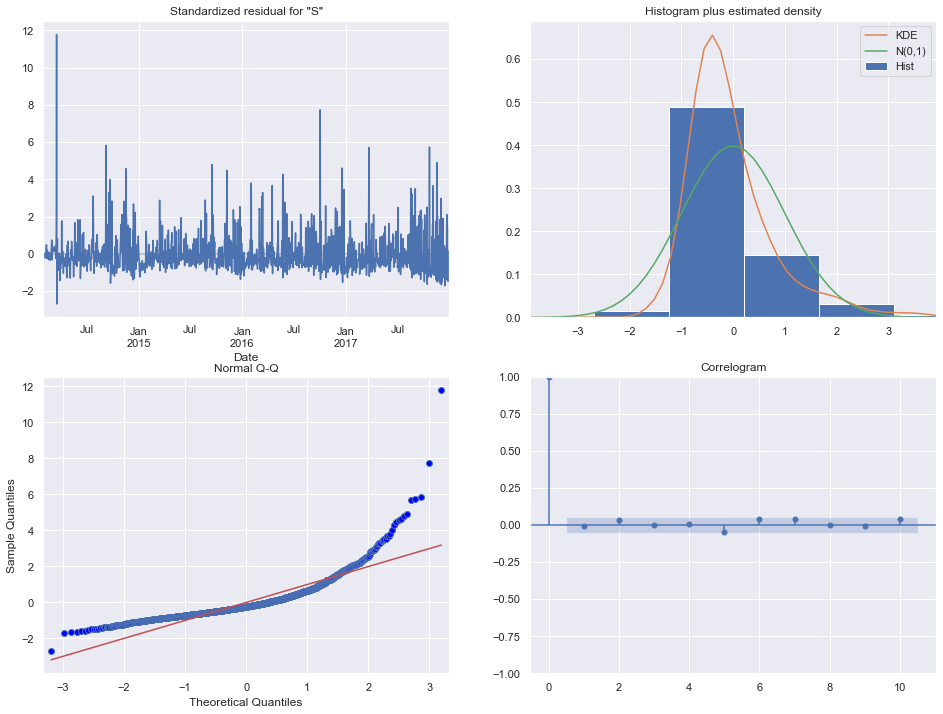

In [687]:
# Running model diagnostiscs to check any unusual behaviour
results.plot_diagnostics(figsize=(16, 12))
plt.savefig(current_dir + "/model/inference.png")
plt.show()

The model diagnostics indicates that the model residuals are near normally distributed

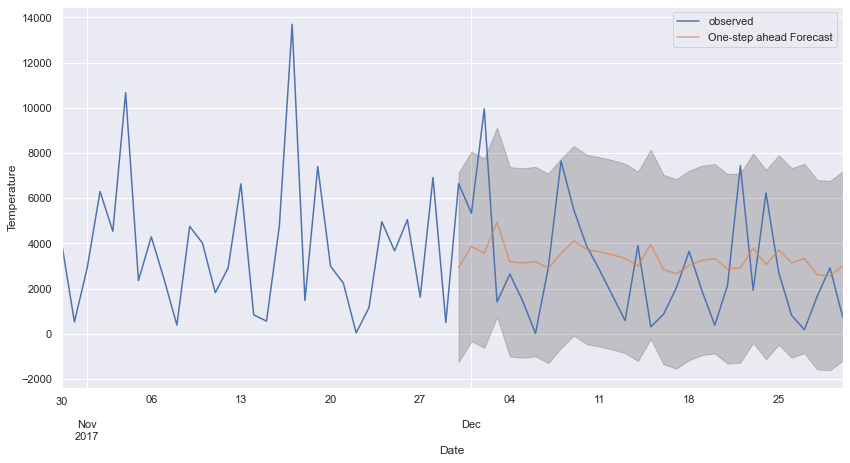

In [688]:
# set forecasts to start at 2017-11-30 to the end of the data to forecast
pred = results.get_prediction(start = pd.to_datetime('2017-11-30'), dynamic=False)
pred_ci = pred.conf_int()

# Plot the forecast
ax = y['2017-10-30':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()

### Calculating MSE and RMSE

In [689]:
# Get predicted values
y_forecasted = pred.predicted_mean.values

# Get actual values
y_truth = y['2017-11-30':].values 

# Calculate MSE and RMSE
mse = mean_squared_error(y_forecasted, y_truth)
print('The Mean Squared Error of our model is \033[4m\033[1m{}\033[0m\033[0m'.format(round(mse, 2)))
print('The Root Mean Squared Error of our model is \033[4m\033[1m{}\033[0m\033[0m'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our model is 6412760.75
The Root Mean Squared Error of our model is 2532.34


In [690]:
time_series.tail()

,Sales,month,year
Date,,,
2017-12-26,814.5940,12,2017
2017-12-27,177.6360,12,2017
2017-12-28,1657.3508,12,2017
2017-12-29,2915.5340,12,2017
2017-12-30,713.7900,12,2017


<a id='predict'></a>
### 7.5. Make Predictions

[...goto toc](#toc)

We will predict the sales of store for next 7 days - **2018-01-06**

In [692]:
# Make forecasting
pred_uc = results.get_forecast(steps = 7)
print(pred_uc.predicted_mean)

2017-12-31    2643.753696
2018-01-01    3202.046211
2018-01-02    3117.684597
2018-01-03    2988.869680
2018-01-04    3005.314723
2018-01-05    3060.751662
2018-01-06    3058.604692
Freq: D, Name: predicted_mean, dtype: float64


In [693]:
pred_ci = pred_uc.conf_int()
pred_ci

,lower Sales,upper Sales
2017-12-31,-1547.695766,6835.203157
2018-01-01,-1038.439308,7442.531731
2018-01-02,-1127.476452,7362.845645
2018-01-03,-1258.722087,7236.461448
2018-01-04,-1244.477946,7255.107392
2018-01-05,-1191.175399,7312.678723
2018-01-06,-1195.470658,7312.680042


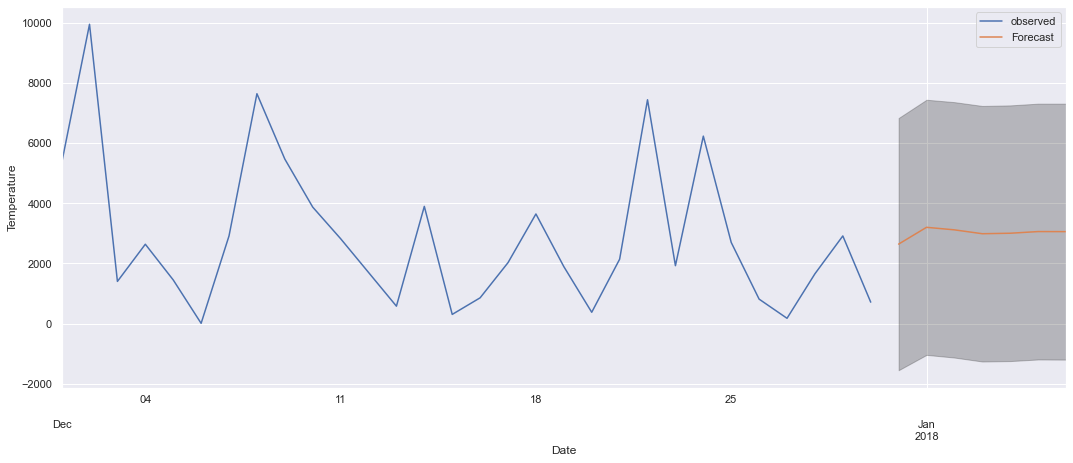

In [696]:
# Visualizing the Forecast

ax = y[y.index > '2017-11-30'].plot(label='observed', figsize=(18, 7))
pred_uc.predicted_mean.plot(ax = ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()
plt.savefig("Forecast.png")
plt.show()

### Save Forecasting

In [697]:
# Create a dataframe to save forecast
forecast = pd.DataFrame()
forecast["Date"] = pred_uc.predicted_mean.index
forecast["Temp"] = pred_uc.predicted_mean.values
forecast

,Date,Temp
0,2017-12-31,2643.753696
1,2018-01-01,3202.046211
2,2018-01-02,3117.684597
3,2018-01-03,2988.869680
4,2018-01-04,3005.314723
5,2018-01-05,3060.751662
6,2018-01-06,3058.604692


In [698]:
# Save forecast
forecast.to_csv(current_dir + "/model/forecast.csv", index=False)

### Save the SARIMA Model

In [699]:
# save model
results.save(current_dir + '/model/model.pkl')

<hr style="border:1.2px solid gray"> </hr>
<h3><center><u>Conclusion</u></center></h3>
<hr style="border:1.2px solid gray"> </hr>

During my research it was found that the store have highest number of Office Supplies products with total 60.3% while minimum number of Technology products (1847) i.e 18.48%. But the store have earned highest revenue of $836154 from Technology products.

The Store earn highest profit in Copiers while Selling price for Chairs and Phones is extremely high compared to other products. 
The Store earn highest profit in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.  

The Total Revenue generated by all these products - $209624!

Out the total number of customers the store have 50 percent of them are consumer and they provide a highest profit of 134,119 dollor with sales of 1,161,401 dollors. Store need to work on improving profits earned on consumers

Additionally, majority of the Profitable Customers are from New York and Michigan State. The store have higher number of sales (725,457) from West region with a net profit of $ 108,418

The sales of the store keeps on increasing over time peroid now we can develop a time-series model capacble enough to predict sales and profit of the store.

Additionaly, I have build a **Seasonal-ARIMA** model to forecast the sales. And stored the predictions in model directory.

The built model is than used to predict the sales of store for next 7 days. 

According to the forecasting sales of the store will be **$ 3058.604692** on **2018-01-06**